# 신경망

-----

인공 신경망 (ANN, artificial neural network)은 생물학적 뉴런의 작동 원에서 영감을 받은 머신러닝 모델이다.

* 생물학적 뉴런은 뇌에서 신호를 전달하고 처리하는 생물학적인 세포 단위

인공 신경망은 딥러닝의 핵심이며 다재다능하고 강력하고 확장성이 좋아 컴퓨터 비전, 자연어 처리 등 다양한 분야에서 활용된다.

먼저 가장 간단한 인공 뉴런인 TLU를 알아보고, 많이 사용되는 다층 퍼셉트론 (MLP, multi-layer perceptron)을 살펴본다.

## TLU (threshold logic unit)

-----
TLU(Threshold Logic Unit)는 이진 분류(binary classification)를 위한 가장 간단한 형태의 **인공 뉴런** 중 하나이다.

* 하나의 TLU는 하나의 생물학적 뉴런의 단순화된 모형이다.

* 입력 가중합을 계산하고 임계값(threshold)을 기준으로 0 또는 1을 출력하는 단순한 유닛

TLU는 입력 $x_1, \cdots, x_n$의 가중치 합

$$ z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n = \sum_{i=1}^{n} x_i w_i = \mathbf{x}^{\top} \mathbf{w} $$

을 계산한 뒤, $z$에 step function을 적용하여 결과를 출력한다. 

* 여기서 $w_i$는 모형 모수의 역할을 한다.
* 나중에 살펴보겠지만, 신경망의 훈련은 결국 데이터에 가장 잘 적합하는 최적의 $w_i$를 찾는 과정이다.
* 이 가중합에 상수항인 bias 항이 추가될 수 있다.

Step function은 $h_{\mathbf{w}}(\mathbf{x}) = \mathrm{step}(z) $로 나타내며, $\mathrm{step}$ 함수로는 다음과 같은 함수들이 이용되었다.

$$ \mathrm{heaviside}(z)  = \left \{ \begin{array}{ll} 0 & z<0 \\ 1 & z \geq 0 \end{array} \right.$$

혹은

$$ \mathrm{sgn}(z)  = \left \{ \begin{array}{lll} -1 & z<0 \\  0 & z = 0 \\ 1 & z > 0 \end{array} \right.$$

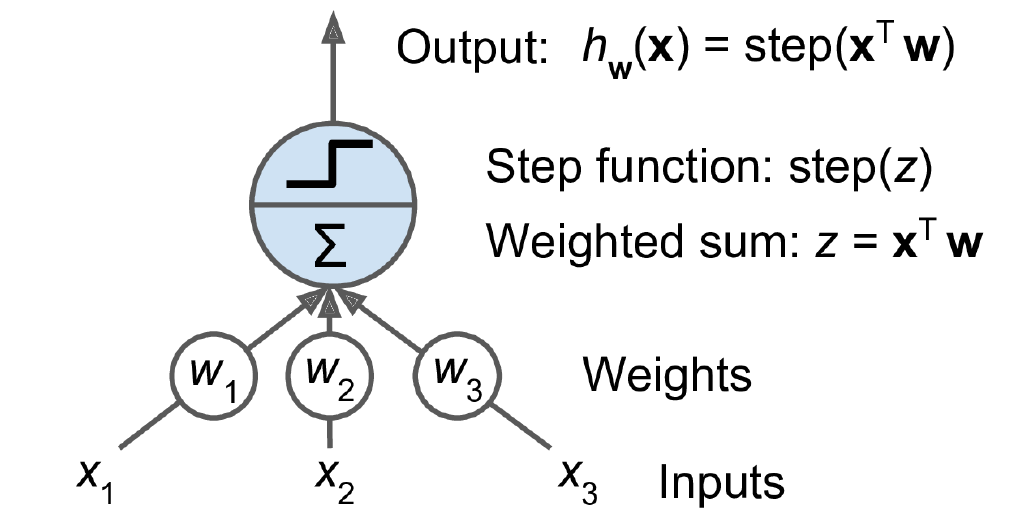

위의 간단한 TLU는 이진 분류 문제에 적용할 수 있다. 주어진 입력에 대해 0 혹은 1을 출력하여 두 클래스 중 하나로 분류하는 것이다.

TLU를 훈련한다는 것은 최적의 $w$들을 찾아 예측을 잘하는 분류기를 만든다는 것을 의미한다.

## 퍼셉트론

퍼셉트론이라는 용어는 때로는 TLU라는 용어와 혼용되어 사용되기도 한다.

하지만 많은 경우 퍼셉트론은 layer가 하나이며, 여러 TLU로 구성된 인공 신경망을 지칭한다.

즉, 퍼셉트론은 더 넓은 의미의 개념이며, TLU는 퍼셉트론의 한 종류 혹은 퍼셉트론을 구성하는 기본 유닛으로 볼 수 있다.

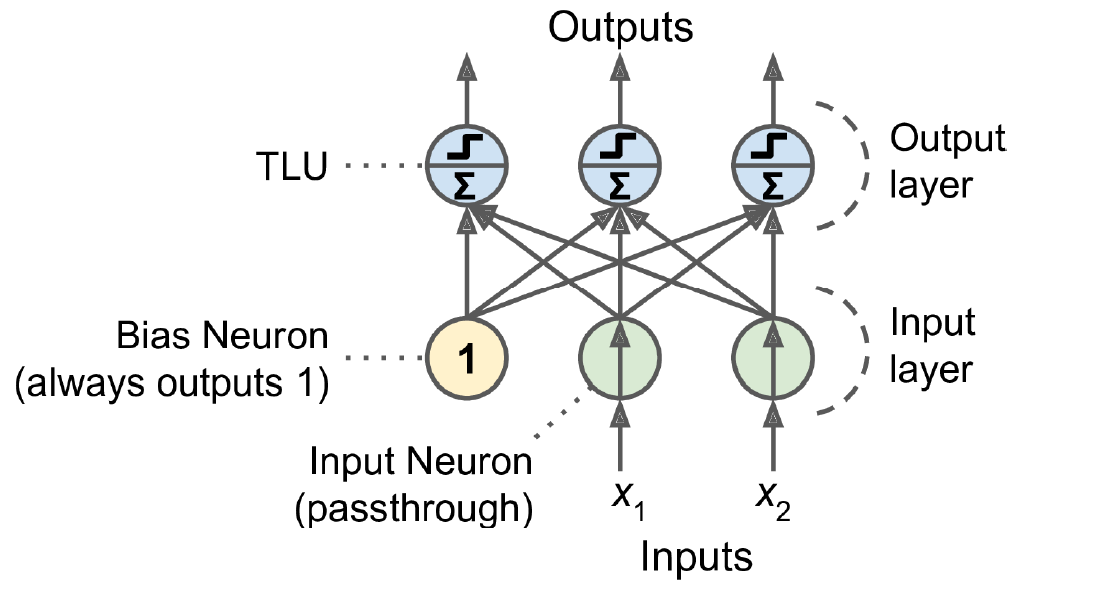

위 그림에서 퍼셉트론은 입력층과 출력층의 두 층으로 구성된 것을 볼 수 있다.  

퍼셉트론에서 입력층은 입력 뉴런인 $x_i$들과 항상 1을 출력하는 bias neuron으로 구성된다.

* 입력 뉴런은 보통 별도의 연산 없이 데이터의 값을 그대로 전달한다.

출력층은 TLU들로 구성되어 있으며, input layer의 값들을 입력받아 연산 후 출력한다.

* 출력층의 각 TLU들은 입력층의 모든 input neuron과 연결되어 있는 것을 볼 수 있다.  

* 이런 관점에서 한 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때, **완전 연결 층 (fully connected layer)** 혹은 **밀집 층 (dense layer)** 이라고 한다.

## 수학적 표기

위 퍼셉트론에서 여러 샘플에 대한 인공 뉴런 층의 출력을 다음과 같이 나타낼 수 있다.

$$ h_{\mathbf{w}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{X} \mathbf{W}_b) $$

### 입력 샘플

여기서 $\mathbf{X}$는 $N \times (p+1)$ 샘플 행렬로 다음처럼 나타낼 수 있다.

$$ 
\mathbf{X} = \begin{bmatrix} 
    x_{11} & \cdots & x_{1p} & 1\\
    x_{21} & \cdots & x_{2p} & 1\\
     \vdots & \vdots & \ddots &  \vdots \\
    x_{N1} & \cdots & x_{Np} & 1  
    \end{bmatrix}
$$

만약 모형에 bias neuron이 없다면, 마지막 1로 이루어진 열은 생략된다.

### 가중치 행렬

그리고 가중치 행렬 $\mathbf{W}_b$의 행의 수는 이전 층에서의 출력 개수, 열의 개수는 해당 층의 출력 개수가 된다.

즉, 해당층에 총 $M$개의 TLU가 있다면, 해당층의 모수들은 다음과 같이 표현된다.

$$ \mathbf{W}_b = \begin{bmatrix} 
w_{11}  & w_{12} & \cdots & w_{1M} \\ 
\vdots  & \vdots &  \ddots & \vdots \\
w_{p1}  & w_{p2} & \cdots &  w_{pM} \\
b_1 & b_2 & \cdots & b_M
\end{bmatrix} 
=
\begin{bmatrix}
\mathbf{W} \\
\mathbf{b}^{\top}
\end{bmatrix} 
$$

$\mathbf{W}_b$의 원소인 $w_{ij}$는 $i$번째 입력 뉴런 (이전 단계)과 $j$번째 출력 뉴런 사이를 연결하는 가중치이다.

특히 마지막 행 벡터는 편향 뉴런에 대한 가중치 벡터로 $\mathbf{b}$로 표현하기도 한다. 

만약 모형에 bias neuron이 없다면, 이 마지막 행은 생략된다.

$\mathbf{W}_b$의 각 열은 각 TLU의 모수들을 나타낸다.

## 인공 뉴런

TLU로부터 발전한 보다 현대적인 인공 뉴런에 대해 알아보자.

### 활성화 함수

활성화 함수 $\phi$는 신경망이 비선형 관계를 학습할 수 있도록 도와주는 비선형 함수이다.

* $\mathbf{X} \mathbf{W}_b$는 선형 결합이므로, 활성화 함수가 없다면 비선형적 관계를 표현할 수 없다. 

앞에서 살펴본 것처럼 초창기의 인공 뉴런인 TLU는 0과 1만을 출력하는 계단 함수가 사용되었다. 

- 단점 : 계단 함수는 미분 불가능한 위치가 있음.

나중에 살펴볼 역전파 알고리즘이 잘 작동하도록, 활성화 함수로 계단함수가 아닌 부드러운 함수인 시그모이드 함수 등이 사용된다.


#### Sigmoid 함수 (시그모이드)

$$
\sigma(z) = \frac{1}{1 + e^{-z}} \quad \text{(출력 범위: } (0, 1) \text{)}
$$

* 부드러운 S자 형태
* 출력이 확률처럼 해석 가능 (예: 이진 분류)
* **단점**: 큰 입력에서 기울기가 0에 가까워져 **gradient vanishing 문제** 발생

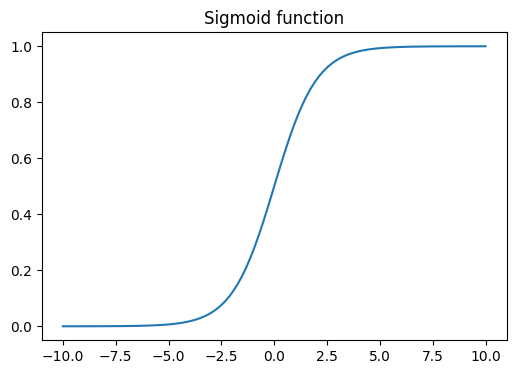

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z) : return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)

plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z))
plt.title("Sigmoid function")
plt.show()

#### Hyperbolic Tangent (Tanh) 함수

$$
\tanh(z) = 2 \sigma(2z) - 1 = \frac{e^z - e^{-z}}{e^z + e^{-z}} \quad \text{(출력 범위: } (-1, 1) \text{)}
$$

* 중심이 0이어서 **sigmoid보다 학습이 빠른 경우가 많음**
* 여전히 gradient vanishing 문제는 있음

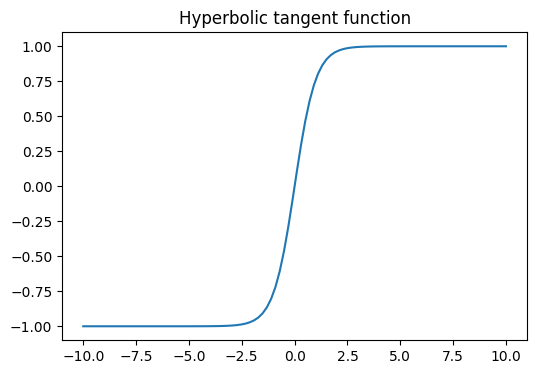

In [2]:
def tanh(z): return 2 * sigmoid(2*z) - 1

plt.figure(figsize=(6,4))
plt.plot(z, tanh(z))
plt.title("Hyperbolic tangent function")
plt.show()

#### ReLU (Rectified Linear Unit)

$$
\phi(z) = \max(0, z)
$$

* 0보다 작으면 0, 크면 그대로 출력
* **계산 효율이 높고**, **gradient가 사라지지 않음** → 딥러닝에서 기본값처럼 사용됨
* 단점: 음수 입력에서는 gradient가 0 → **죽은 뉴런 문제(dead neuron)** 발생 가능

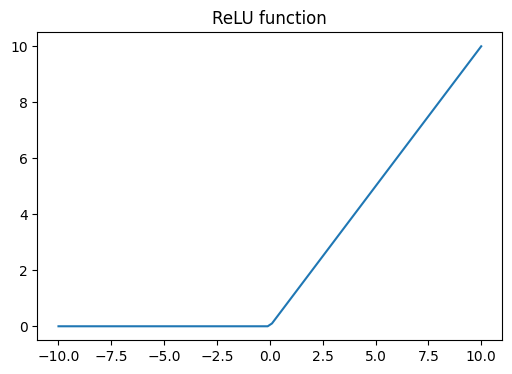

In [3]:
def ReLU(z): return np.maximum(0, z)

plt.figure(figsize=(6,4))
plt.plot(z, ReLU(z))
plt.title("ReLU function")
plt.show()

사이킷런에서 하나의 TLU 네트워크를 구현한 퍼셉트론 클래스를 제공한다.

[sklearn.linear_model.Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

하지만 일반적으로 인공 신경망을 구성하기 위해서는 tensorflow, keras나 pytorch 등과 같은 신경망 전문 모듈을 이용한다.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

### 단일층 퍼셉트론의 한계

단일층 퍼셉트론(single-layer perceptron)은 **선형 분류기(linear classifier)** 로, 선형적으로 분리되지 않는 문제는 해결할 수 없다.

예를 들어 XOR 문제는 선형 분리 불가능한 대표적 사례로, 단일층 퍼셉트론은 이를 해결할 수 없다

XOR은 입력이 (0,0) 이거나 (1,1)이면 0을 출력하고, (1,0)이거나 (0,1)이면 1을 출력하는데 단일층 퍼셉트론은 이 문제를 해결하지 못한다.

- 어떤 활성화 함수를 사용하더라도, 단일층 퍼셉트론은 XOR 문제를 해결할 수 없다.

a | b | a XOR b 
--|--|:--:
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

XOR 문제의 네 개의 데이터 포인트는 평면상에서 두 클래스를 하나의 직선으로 분리할 수 없다. 

즉, 어떤 선형 결정경계 $w^\top x + b = 0$도 모든 클래스를 정확히 나누지 못한다.

## 다층 퍼셉트론 (Multi-layer perceptron)

퍼셉트론을 여러 층 쌓아올린 다층 퍼셉트론 (MLP)은 단층 퍼셉트론의 단점을 극복 가능하다.

- 단층 퍼셉트론은 선형 분리 문제만 해결할 수 있는 반면, MLP는 은닉층을 통해 입력 공간을 비선형적으로 변환하여 XOR과 같은 비선형 분리 문제도 해결할 수 있다

MLP는 입력층 (input layer) 하나와 은닉층 (hidden layer)라 불리우는 하나 이상의 dense layer 층과 마지막 출력층 (output layer)로 구성된다.

* 각 은닉층은 여러 개의 **인공 뉴런**으로 구성되며, 이전 층의 모든 뉴런과 연결되는 **완전 연결층 (dense layer, fully connected layer)** 이다.

* 은닉층에서 복잡한 계산을 수행하게 되며, 은닉층의 구조에 따라 고차원적 패턴이나 비선형 관계를 학습할 수 있다.

* 회귀 문제에서는 output layer에서 최종적으로 $y$의 예측값을 계산하여 출력한다. 
  
* 분류 문제에서는 sigmoid (이진분류)나 softmax (다중분류) 등의 함수를 출력층의 결과에 적용하여 최종 결론을 이끌어 낸다.

Hidden layer를 여러 개 쌓아 올린 인공 신경망을 심층 신경망 (DNN, deep neural network)이라고 한다.

다층 퍼셉트론은 **역전파 (backpropagation) 알고리즘**을 사용하여 손실 함수에 대한 기울기를 계산한다. 

이를 바탕으로 **경사하강법 (gradient descent)** 을 통해 가중치를 업데이트한다.

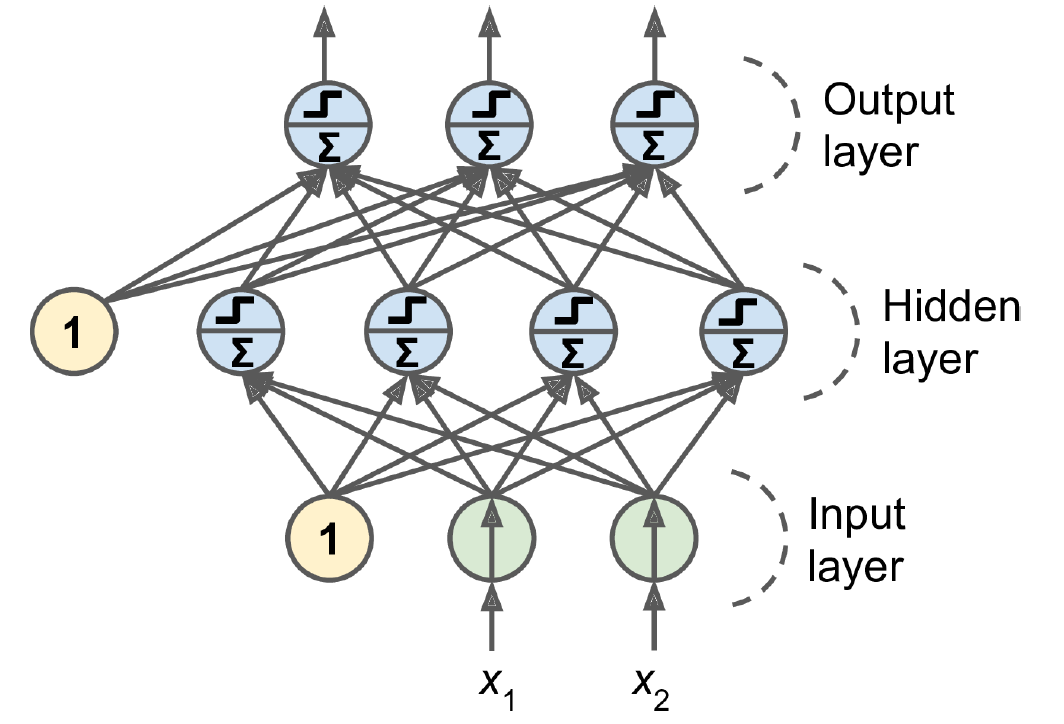

#### 이진 분류에서의 출력층과 Sigmoid 함수

클래스 0과 1이 있는 이진 분류에서는 클래스 1에 속할 확률 예측값을 출력하며, 출력층의 마지막에서 **sigmoid 함수**를 사용한다.

- 출력층에는 하나의 유닛만이 존재.

sigmoid 함수는 다음과 같이 정의된다.

$$
p = \sigma(z) = \frac{1}{1 + \exp(-z)}
$$

* 여기서 $z$는 출력층 뉴런의 계산 결과.

sigmoid 함수의 출력 \$p\$는 0과 1 사이의 값이며, 이는 해당 입력이 1번 클래스에 속할 확률로 해석된다.

출력값이 0.5보다 크면 1번 클래스로, 작으면 0번 클래스로 분류하는 것이 일반적이다.

#### 다중 클래스 분류에서의 출력층과 Softmax 함수

다중 $K$-클래스 분류에서는 각 클래스 $k$에 속할 **확률 예측값**을 출력해야 하므로, 출력층의 마지막에서 **softmax 함수**를 사용한다.

- 출력층에는 $K$개의 유닛이 존재

softmax 함수는 다음과 같이 정의된다.

$$
p_k = \frac{\exp(z_k)}{\sum_{j=1}^{K} \exp(z_j)}
$$

- 여기서 $z_k$는 출력층에서 $k$번째 유닛의 계산 결과.

확률 벡터 $\mathbf{p} = (p_1, p_2, \dots, p_K)$는 각 클래스에 속할 확률을 나타내며, 모든 $p_k$의 합은 1이 된다.

softmax 함수는 예측값을 확률 분포의 형태로 변환하므로, 모델의 출력값을 확률로 해석할 수 있도록 해준다.

# 신경망 모형 훈련

일반적인 기계학습에서 모형의 모수를 추정하는 훈련 과정은 다음과 같다.

모형의 훈련을 위해 먼저 손실 함수와 비용 함수를 정한다.

- **손실 함수 (loss function)** : 하나의 데이터 포인트에 대한 예측값과 실제값 사이의 차이를 정량화하는 함수이며

- **비용 함수 (cost function)** : 전체 훈련 데이터에 대해 손실 함수의 평균 또는 합으로 정의

회귀 문제에서는 손실 함수로 평균제곱오차 (MSE)를 많이 사용한다.

분류 문제에서는 손실 함수로 이진 분류의 경우 binary cross-entropy, 다중 클래스 분류의 경우 categorical cross-entropy를 주로 사용한다.

이 후 **비용 함수의 값을 최소화**하는 파라미터 값들을 찾는 과정을 모형 훈련 과정이라고 한다.

#### 1. 평균제곱오차 (MSE, Mean Squared Error)

회귀 문제에서 가장 일반적으로 사용되는 손실 함수.

**단일 데이터 포인트 \$(x\_i, y\_i)\$에 대한 손실 함수**:

$$
\ell(y_i, \hat{y_i}) = (y_i - \hat{y}_i)^2
$$

**전체 훈련 데이터에 대한 비용 함수**:

$$
J(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

여기서 $\hat{y}_i$는 모형의 예측값이다.

#### 2. 이진 교차 엔트로피 (Binary Cross-Entropy)

이진 분류 문제에서 사용되며, 정답 레이블 $y_i \in \{0,1\}$이고 예측 확률 $\hat{y}_i \in (0,1)$인 경우 다음과 같이 정의된다.

**단일 데이터 포인트에 대한 손실 함수**:

$$
\ell(y_i, \hat{y}_i) = - \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

**전체 데이터에 대한 비용 함수**:

$$
J(\boldsymbol{\theta}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

이 손실 함수는 예측 확률이 실제 레이블에 가까울수록 작은 값을 가지며, 멀어질수록 크게 증가한다.


#### 3. 범주형 교차 엔트로피 (Categorical Cross-Entropy)

$K$개의 클래스 중 하나로 분류하는 다중 클래스 분류 문제에서 사용된다. 

실제 정답은 원-핫 인코딩된 벡터 $y_i = (y_{i1}, \dots, y_{iK})$로 주어지며, 예측 확률 벡터는 $\hat y_i = (p_{i1}, \dots, p_{iK})$이다.

- 원-핫 인코딩 벡터 : 정답 클래스의 위치는 1이고 나머지는 0인 벡터.

**단일 데이터 포인트에 대한 손실 함수**:

$$
\ell(y_i, \hat{y}_i) = - \sum_{k=1}^{K} y_{ik} \log(p_{ik})
$$

**전체 데이터에 대한 비용 함수**:

$$
J(\boldsymbol{\theta}) = - \frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \log(p_{ik})
$$

여기서 $p_{ik}$는 입력 $x_i$에 대해 softmax 함수를 거쳐 예측된 클래스 $k$에 대한 확률이다.

## 경사하강법 (복습)

경사하강법은 여러 기계학습의 방법론에서 최적의 해를 찾는 일반적인 방법이다.

비용함수의 극소점의 위치는 많은 경우 닫힌 해로 나타나지 않는다.

이에 미분을 이용한 경사하강법의 방법이 이용된다.

경사하강법은 계산된 기울기를 바탕으로 기울기가 감소하는 방향을 따라 비용함수를 최소화하는 극소 지점을 향해 조금씩 이동하는 방법이다.

모수가 여러 개인 경우, 각 모수($\theta$)들에 대해 비용함수의 기울기들을 계산할 수 있는데 이 기울기들을 모아놓은 벡터를 그레디언트 벡터라고 한다.

- 그레디언트 벡터는 $\nabla$ 혹은 $\nabla_{\boldsymbol{\theta}}$로 표현한다.

$$\nabla_{\boldsymbol{\theta}} J (\boldsymbol{\theta}) = \begin{bmatrix}  \frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_p} J(\boldsymbol{\theta}) \end{bmatrix}  $$

먼저 손실함수에 대한 gradient, $\nabla_{\boldsymbol{\theta}} J$를 계산하고, 그레디언트의 반대 방향으로 $\boldsymbol{\theta}$를 업데이트한다.

현재 gradient가 계산된 $\boldsymbol{\theta}$에서 다음 스텝에서의 $\boldsymbol{\theta}^{\text{(next step)}}$는 다음과 같다.

$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} J (\boldsymbol{\theta}) $$

- 여기서 $\eta$는 **학습률**로, 비용 함수의 극소점 위치를 향해 이동하는 속도이다.

- 이렇게 이동한 $\boldsymbol{\theta}^{\text{(next step)}}$을 새로운 $\boldsymbol{\theta}$로 삼아 gradient를 새로 계산하고 위 과정을 반복.

그레디언트 벡터는 올라가는 방향이기 때문에 비용함수의 극소점을 향해 내려가기 위해서는 $-$를 취한 것을 볼 수 있다.

학습률 $\eta$가 크면 더 빠르게 극소점을 향해 갈 것이고, $\eta$가 작으면 천천히 향해 갈 것이다.

그러나 학습률이 너무 크면, 극소점을 지나쳐 제대로 수렴하지 못할 수도 있다.

많은 경우 비용함수의 정확한 형태를 모르기 때문에 적절한 $\eta$를 설정하는 것은 반복적인 trial and error나 적절한 학습 스케쥴링을 이용.

경사 하강법은 다시 몇 가지로 분류된다.

### 배치 경사 하강법

경사 하강법을 구현하려면 앞서 살펴 보았던 gradient vector를 매 스텝마다 계산하여야 한다.

만약 gradient vector를 계산할 때 모든 훈련 데이터를 이용한다면 이를 배치 경사 하강법 (batch gradient descent)이라고 한다.

만약 훈련 세트가 매우 크다면 gradient vector를 계산하는데 시간이 오래 걸릴 것이다.

### 확률적 경사 하강법

확률적 경사 하강법 (stochastic gradient decent)에서는 매 스텝에서 샘플의 one observation을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.

장점

- 매 스텝에서의 그레디언트 계산이 빠르다.

- 매 반복에서 하나의 샘플만 취하면 되므로, 매우 큰 훈련 데이터도 학습 가능하다.

단점

- 샘플은 무작위로 선택되므로 배치 경사 하강법보다 불안정하다.

- 비용함수가 최소값에 이를 때까지 요동치며 접근하며, 최소값에 완전히 안착하지 못한다.

하지만, 마지막 단점은 오히려 장점이 되기도 한다. 

- 비용함수의 형태가 불규칙할 경우 지역 극소값을 건너뛸 수도 있기 때문.
- 반면 배치 경사하강법은 지역 극소값에 도달시 빠져나오지 못해 전역 극소값으로 가지 못한다.

한편, sample을 선택할 때, 비복원 추출을 하며, 이에 따라 데이터의 개수만큼 스텝이 진행되면 모든 샘플들이 한 번씩 선택된다.  

- 이 하나의 과정을 **epoch** 라고 부른다. 

- 통상적으로 여러 번의 epoch를 수행한다.


### 미니배치 경사 하강법

각 스텝에서 하나의 샘플이 아니라 미니배치라 불리우는 임의의 작은 수($>1$)의 샘플에 대해 그레디언트를 계산하는 방법.

그레디언트를 계산할 때 사용하는 샘플의 수를 보통 batch size라고 한다.

즉 SGD는 batch size = 1인 미니배치 경사 하강법과 같다.

미니배치의 크기를 적절히 하면 이 알고리즘은 파라미터 공간에서 SGD 보다 덜 불규칙하게 움직일 수 있다.


## 역전파 (Back propagation) 알고리즘

역전파 알고리즘은 인공 신경망 훈련의 핵심 개념이다.

이 알고리즘은 크게 세 단계로 구성된다.  
 1. 순전파(forward propagation)
 2. 역전파(backward propagation)
 3. 가중치 업데이트


#### 1. 순전파 단계

먼저 입력 데이터를 신경망에 통과시켜 각 층의 뉴런을 따라 계산을 수행하고, 최종 예측값 $\hat{y}$를 얻는다.

이 예측값과 실제 $y$를 비교하여 오차 (loss) 또는 손실 함수 (cost function)를 계산한다.

#### 2. 역전파 단계

오차를 계산한 후, 출력층에서 입력층 방향으로 네트워크를 따라 거꾸로 이동하며 각 가중치가 오차에 얼마나 기여했는지를 계산한다.

이를 위해 연쇄법칙 (chain rule)을 이용하여 손실 함수의 각 파라미터에 대한 기울기 (gradient)를 계산한다.

#### 3. 가중치 업데이트 단계 (Gradient Descent)

계산된 gradient를 사용하여 경사하강법 (gradient descent) 등의 최적화 알고리즘을 통해 가중치를 업데이트한다.  

이때의 목적은 손실 함수 값을 줄이는 방향으로 모형 파라미터를 조정하는 것이다.

### 역전파 알고리즘 상세 

$L-1$개의 hidden layer가 있다고 하자. 

layer 0는 input layer를 뜻하고, layer 1부터 $L-1$까지는 hidden layer, layer $L$은 output layer를 뜻한다.

Input layer를 제외한 각 layer $\ell$에는 $s_{\ell}$개의 유닛들이 있고, $s_{L} = K$인 $K$-분류 문제를 생각해 보자.

* 다중 분류 문제에서 출력층의 뉴런의 수는 클래스의 수와 일치한다. 이 결과에 softmax를 적용하여 클래스 예측하는데 사용.  

* 이진 분류 문제에서는 출력층의 뉴런의 수는 보통 하나로 한 후, sigmoid 함수를 적용한다.

output layer에서는 softmax 함수를 이용하여 클래스를 결정한다.
* 아래 그림에서 softmax 함수는 마지막 층의 모든 뉴런의 연산 결과를 이용해야 하므로, 이 뉴런들을 모두 커버하는 긴 직사각형의 형태로 그려짐

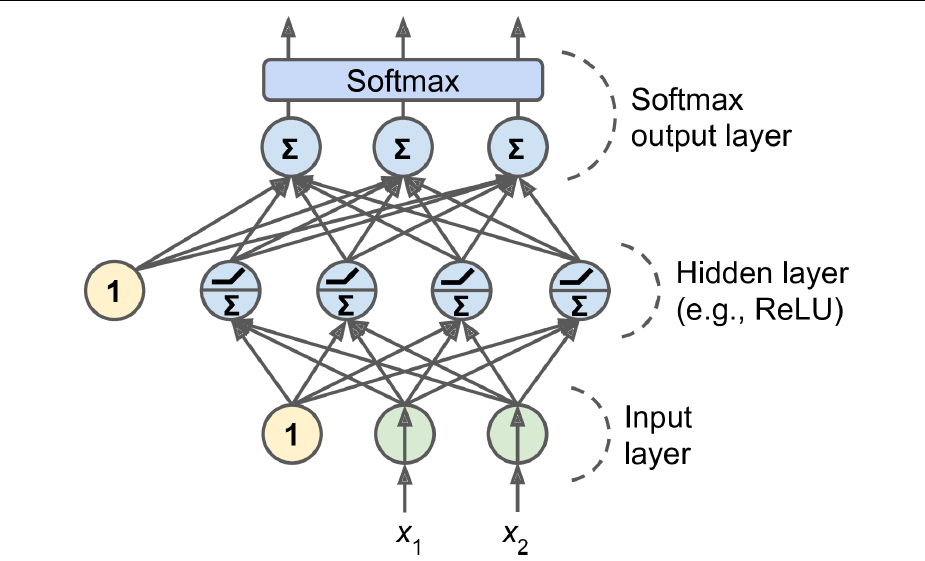

다양한 notation이 등장하므로 정리하고 시작하자.

* $w_{ij}^{(\ell)}$ : layer-$\ell$에 속한 가중치(모수)로 다음 두 값들의 관계를 나타낸다.<br><br>
  * $\ell-1$번째 layer의 유닛 $i$의 output인 $a_{i}^{(\ell-1)}$과<br><br>
  * $\ell$번째 layer의 유닛 $j$의 중간 output인 $z_{j}^{(\ell)}$ (중간 output이라 함은 활성 함수 적용 전)<br><br>
* $z_{j}^{(\ell)}$ : layer-$\ell$의 $j$번째 유닛의 중간 결과로 가중치 $w_{ij}^{(\ell)}$로 선형 변환 결과 <br><br>
* $a_{j}^{(\ell)}$ : $z_{j}^{(\ell)}$에 활성화 함수를 적용한 결과로 layer-$\ell$의 $j$번째 유닛의 output <br><br>

<p> <font color=#00008B> &#9635 Weight matrix와 관련된 미분 </font> </p>

즉,

$$ z_{j}^{(\ell)} = \sum_{i=1}^{s_{\ell - 1}}  a_i^{(\ell-1)} w_{ij}^{(\ell)}.$$

활성함수 $\phi$는 $z$에 적용된다. 즉,

$$ a_{j}^{(\ell)} = \phi (z_j^{(\ell)}).$$

미분을 통해 다음의 결과를 얻는다.

$$ \frac{\partial z_j^{(\ell)}}{\partial a_i^{(\ell - 1)}} = w_{ij}^{(\ell)}, \quad  \frac{\partial z_j^{(\ell)}}{\partial w_{ij}^{(\ell)}} = a_i^{(\ell - 1)} $$

<p> <font color=#00008B> &#9635 Cost function  </font> </p>

다중 분류 문제에서 stochastic gradient descent 방법을 적용할 경우, 주어진 데이터 하나에 대해 cost function은 cross entropy를 통해 다음과 같이 정의할 수 있다.

(마찬가지로 미니 배치 gradient descent의 경우 배치 단위로 여러 데이터에 대해 평균내어 cost function이 정의됨.)

$$ J = - \sum_{j=1}^{K} y_j \log p_j$$

- 여기서 $y_j$는 해당 데이터가 class $j$에 속하면 1이고 그렇지 않으면 0이다.

또한, $p_j$는 모형에서 예측한 각 클래스에 속할 확률로, 마지막 출력값들에 softmax 함수를 적용하여 얻는다.

$$ p_j = \frac{\exp(z_j^{(L)})}{\sum_{k=1}^{K} \exp(z_k^{(L)})}.$$

한편, Chain rule에 의해 계산 결과

$$ \frac{\partial J}{\partial z_j^{(L)}} =  
\sum_{i=1}^{K} \left(\frac{\partial J}{\partial p_i} \frac{\partial p_i}{\partial z^{(L)}_j} \right) = 
-\sum_{i=1}^{K} \left( \frac{y_i}{p_i} \frac{\partial p_i}{\partial z^{(L)}_j} \right) = - y_j(1-p_j) + p_j \sum_{i \neq j} y_i =   p_j - y_j $$

이다. 여기서

$$ \frac{\partial p_i}{\partial z^{(L)}_j} = \left\{\begin{array}{lr}
        p_j(1- p_j), & \text{for } k = j\\
        -p_i p_j, & \text{for } k \neq j \\
        \end{array}\right. $$
를 이용하였다.

우리의 최종 목적은 cost function $J$에 대해 다음의 값을 계산하는 것이다.

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} $$

<p> <font color=#00008B> &#9635 &delta;</font> </p>

이를 위해 먼저

$$ \delta_{j}^{(\ell)} =  \frac{\partial J}{\partial z_j^{(\ell)}} $$

라고 정의하자.

- $\ell$층의 $j$번째 뉴런이 loss function에 얼마나 기여했는가를 나타내는 값

- 이 값이 클수록 그 뉴런이 손실을 많이 유발했고, 따라서 가중치를 많이 조정해야 함을 뜻함

위에서 계산한 바와 같이 마지막 층에 대해

$$ \delta_{j}^{(L)} = \frac{\partial J}{\partial z_j^{(L)}} = p_j - y_j, \quad\quad p_j = \frac{\exp(z_j^{(L)})}{\sum_{k=1}^{K} \exp(z_k^{(L)})}  $$

이다. 

Hidden layer들에 대해서도 비슷하게 전개할 수 있는데,

$$
\delta_{j}^{(\ell)} = \frac{\partial J}{\partial z_{j}^{(\ell)}}= 
\frac{\partial J}{\partial a_j^{(\ell)}}\frac{\partial a_j^{(\ell)}}{\partial z_{j}^{(\ell)}} = 
\left( \sum_{i=1}^{s_{\ell + 1}} \frac{\partial J}{\partial z_{i}^{(\ell + 1)}} \frac{\partial z_i^{(\ell + 1)}}{\partial a_j^{(\ell)}} \right) \frac{\partial a_j^{(\ell)}}{\partial z_j^{(\ell)}} = \left( \sum_{i=1}^{s_{\ell + 1}} \delta_i^{(\ell + 1)} w_{ij}^{(\ell + 1)} \right) \phi' (z_j^{(\ell)}).
$$

* 이 식은 back propagation의 핵심인데, $\ell$층의 값인 $\delta_{j}^{(\ell)}$를 $\ell+1$층의 값인 $\delta_{i}^{(\ell + 1)}$들로 표현할 수 있기 때문.

* 이것이 가능한 것은 chain rule을 다음과 같이 적용한 아이디어 덕분

$$ \frac{\partial J}{\partial a_{j}^{(\ell)}} = \sum_{i=1}^{s_{\ell + 1}} \frac{\partial J}{\partial z_{i}^{(\ell + 1)}} \frac{\partial z_i^{(\ell + 1)}}{\partial a_j^{(\ell)}}  $$

* 위 식을 해석하자면, $a_{j}^{(\ell)}$ 변화에 따른 $J$의 변화량은 다음 값들의 합:
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{1}^{(\ell + 1)}$의 변화량 $\times$ $z_{1}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{2}^{(\ell + 1)}$의 변화량 $\times$ $z_{2}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량
  * $\hspace{5cm}\vdots$
  * $a_{j}^{(\ell)}$ 변화에 따른 $z_{s_{\ell + 1}}^{(\ell + 1)}$의 변화량 $\times$ $z_{s_{\ell + 1}}^{(\ell + 1)}$의 변화에 따른 $J$의 변화량 

위 미분식을 좀 더 자세히 살펴보자면, $J$는 $z_{i}^{(\ell + 1)}$들의 함수로 다음과 같이 나타난다.

$$ J \left(z_{1}^{(\ell + 1)}, \cdots, z_{s_{\ell} + 1}^{(\ell + 1)} \right) $$

그런데, 각 $z_{i}^{(\ell + 1)}$들은 $a_{j}^{\ell}$들의 함수이므로, 다음과 같이 표현할 수 있다.

$$ J \left(z_{1}^{(\ell + 1)}\left(a_1^{(\ell)}, \cdots, a_{s_\ell}^{(\ell)}\right), \cdots, z_{s_{\ell} + 1}^{(\ell + 1)}\left(a_1^{(\ell)}, \cdots, a_{s_\ell}^{(\ell)}\right) \right) $$

즉, $J$를 $a_j^{\ell}$로 미분하기 위해, $z_{i}^{(\ell + 1)}$에 대해 먼저 미분하는데, $z_{i}^{(\ell + 1)}$들이 총 $s_{\ell + 1}$개 있으므로, chain rule을 적용하면 위와 같은 summation 형태로 나타나게 됨.

마지막으로

$$ \frac{\partial J}{\partial w_{ij}^{(\ell)}} = \frac{\partial J}{\partial z_j^{(\ell)}} \frac{\partial z_j^{(\ell)}}{\partial w_{ij}^{(\ell)}} =  \delta_j^{(\ell)} a_i^{(\ell - 1)}.$$


<p> <font color=#00008B> &#9635 Matrix notation for gradient </font> </p>

Matrix notation 을 이용하면, $L$이 아닌 layer에서 $\delta^{(\ell)} = \begin{bmatrix}\delta^{(\ell)}_1,  \cdots, \delta^{(\ell)}_{s_\ell} \end{bmatrix}^{\top}$ 벡터는

$$ \delta^{(\ell)} = \begin{cases} \left( {\mathbf{W}^{(\ell + 1)}}^{\top} \delta^{(\ell + 1)} \right) \circ \phi'(z^{(\ell)}) & \text{if } \ell = 1, 
\cdots, L-1 \\
\mathbf{p} - \mathbf{y} & \text{if } \ell = L
\end{cases} $$

이다. 한편, $\mathbf{p} = \begin{bmatrix} p_1, \cdots, p_K \end{bmatrix}^{\top}, \enspace \mathbf{y} = \begin{bmatrix} y_1, \cdots, y_K \end{bmatrix}^{\top}$이고, $\circ$는 elementwise multiplication이다.


이를 이용하여 weight들에 대한 gradient matrix를 표현할 수 있다.  

$$ \nabla_{\mathbf{W}^{(\ell)}} J  = \delta^{(\ell)} {a^{(\ell-1)}}^{\top} $$

$$ \nabla_{\mathbf{b}^{(\ell)}} J  = \delta^{(\ell)}  $$


위 방법을 이용하면 모든 layer에 대해 gradient 벡터를 구할 수 있고, 이를 통해 경사 하강 업데이트를 적용하여 parameter들을 업데이트 한다.

예를 들어 학습률 $\eta$를 가지고 있으면

$$ w^{(\ell)}_{ij} \leftarrow w_{ij}^{(\ell)} - \eta \frac{\partial J}{\partial w_{ij}^{(\ell)}}.$$

<p> <font color=#00008B> &#9635 가중치 업데이트 과정 </font> </p>
가중치 업데이트 과정을 정리하면 다음과 같다.

* Step 1: 훈련 데이터의 배치를 가져온다.
* Step 2: Cost function의 값을 계산하기 위해 정방향으로 진행 (forward propagation)한다.
* Step 3: Back propagattion을 수행하여 그레디언트를 계산한다.
* Step 4: 계산된 그레디언트로 가중치 값들을 업데이트한다. 

In [6]:
from tensorflow.keras import Sequential

model = Sequential()

In [7]:
type(model)

keras.engine.sequential.Sequential

In [8]:
# 아래와 같이 생성하기도 한다.
import tensorflow as tf
model = tf.keras.Sequential()

#### Dense layer 

[`tensorflow.keras.layers.Dense` ](https://keras.io/api/layers/core_layers/dense/)로 구현되어 있으며, 가장 기본적인 뉴럴 네트워크 층으로 base layer를 상속받아 구현되었다.

Dense는 다음 작업을 구현한다. 

```output = activation(dot(input, kernel) + bias)```

주요 인자로는 다음과 같다.

* `units`: 양의 정수이며, 뉴런의 숫자.  
* `activation`: 활성화 함수의 종류. 기본값은 linear 함수
* `use_bias`: Boolean, bias vector의 이용 여부

[```.add()```](https://keras.io/api/models/sequential/#add-method)를 이용하여 생성된 모형에 순차적으로 layer들을 쌓는 것이 가능하다.

아래 코드에서 `input_shape=(2,)`은 입력 변수가 두 개의 차원으로 이루어졌음을 의미한다.

마지막으로 추가된 layer에서 유닛의 개수는 하나이며, 활성화 함수로 sigmoid 함수를 사용하고 있다. 

* 이 예제에서 y가 두 개의 클래스로 구성된 이진 분류 문제이기 때문이다. 

In [9]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(2,), activation='relu'))  # 2개의 feature variable을 받을 예정
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))   # binary class 구별을 위함

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


아래 코드에서 loss function으로 `'binary_crossentropy'`를 사용하였다. 

이는 이번 예제에서 2개의 클래스로 구성된 y를 분류하는 문제를 다루기 때문이다.

이 손실 함수의 식은 다음과 같다.

$$L(y, \hat y) = - y  \log(\hat y) - (1 - y)  \log(1 - \hat y)$$


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### [Loss](https://keras.io/api/losses/) function

머신러닝에서 Loss 함수는 학습 과정에서 오류나 편차를 찾는 데 사용되며, Keras는 모델 컴파일 과정에서 loss function이 필요하다.

Keras는 상당히 많은 종류의 loss function을 제공한다.

* mean_squared_error  
* mean_absolute_error  
* mean_absolute_percentage_error  
* mean_squared_logarithmic_error  
* squared_hinge  
* hinge  
* categorical_hinge  
* logcosh  
* huber_loss  
* categorical_crossentropy  
   * y label is one-hot vector representation, e.g., (0, 0, 0, 0, 1, 0, 0)
* sparse_categorical_crossentropy  
   * y label is integers
* binary_crossentropy  
   * y label is 0 or 1
* kullback_leibler_divergence  
* poisson  
* cosine_proximity  
* is_categorical_crossentropy

이 중 많이 사용되는 것으로는 mean_squared_error, categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy 등이 있다.

#### [Optimizer](https://keras.io/api/optimizers/)

기계학습에서 최적화는 예측과 손실 함수를 비교하여 입력 가중치를 최적화하는 중요한 프로세스이다.  
Keras는 다양한 optimizer를 제공한다.

* SGD − Stochastic gradient descent optimizer.

* RMSprop − RMSProp optimizer.

* Adagrad − Adagrad optimizer.

* Adadelta − Adadelta optimizer.

* Adam − Adam optimizer.

* Adamax − Adamax optimizer from Adam.

* Nadam − Nesterov Adam optimizer.

####  [Metrics](https://keras.io/api/metrics/)

기계학습에서 Metrics는 모델의 성능을 평가하는 데 사용되며, 손실 함수와 유사하지만 훈련 과정에서는 사용되지 않고, 훈련 결과나 테스트 셋에 대한 예측 결과를 평가하는 데에 사용된다. 

분류 문제에서는 다음과 같은 metric들이 활용된다.

* accuracy
* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy
* cosine_proximity
* clone_metric


회귀 문제에서는 다음과 같은 metric들이 활용된다.

* mean_squared_error  
* mean_absolute_error  
* mean_absolute_percentage_error  
* mean_squared_logarithmic_error 

필요한 경우 최적화 프로그램을 추가로 구성할 수 있다. 
Keras의 철학은 단순한 것을 단순하게 유지하면서 사용자가 필요할 때 완전히 제어 할 수 있도록 하는 것이다.

In [1]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_training = X[250:, :]
X_testing = X[:250, :]
Targets_training = targets[250:]
Targets_testing = targets[:250]

In [12]:
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5)

Epoch 1/30
150/150 [==============================] - 1s 1ms/step - loss: 0.6443 - accuracy: 0.7573
Epoch 2/30
150/150 [==============================] - 0s 1ms/step - loss: 0.5785 - accuracy: 0.9867
Epoch 3/30
150/150 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 1.0000
Epoch 4/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 1.0000
Epoch 5/30
150/150 [==============================] - 0s 1ms/step - loss: 0.3781 - accuracy: 1.0000
Epoch 6/30
150/150 [==============================] - 0s 1ms/step - loss: 0.3230 - accuracy: 1.0000
Epoch 7/30
150/150 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 1.0000
Epoch 8/30
150/150 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 1.0000
Epoch 9/30
150/150 [==============================] - 0s 1ms/step - loss: 0.2163 - accuracy: 1.0000
Epoch 10/30
150/150 [==============================] - 0s 1ms/step - loss: 0.1931 - accuracy: 1.0000

[`.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method)으로 모델의 성능 평가를 할 수 있다.

In [13]:
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(model.metrics_names)
print(test_results)

8/8 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 1.0000
['loss', 'accuracy']
[0.03121953271329403, 1.0]


In [14]:
y_prob = model.predict(X_testing)
predicted_class = np.where(y_prob > 0.5, 1,0)

8/8 [==============================] - 0s 931us/step


예측값과 실제값을 비교해 보자.

In [15]:
np.c_[predicted_class, Targets_testing]

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1,